In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix


In [4]:
from tensorflow.examples.tutorials.mnist import input_data
data = input_data.read_data_sets("data/MNIST/", one_hot = True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting data/MNIST/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting data/MNIST/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting data/MNIST/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting data/MNIST/t10k-labels-idx1-ubyte.gz


In [8]:
data.test.labels[0:5, :]

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.]])

In [9]:
data.test.cls = np.array([label.argmax() for label in data.test.labels])

In [17]:
data.test.cls[0:5]

array([7, 2, 1, 0, 4])

In [14]:
img_size = 28
img_size_flat = img_size *  img_size
img_shape = (img_size, img_size)
num_classes = 10

In [19]:
def plot_images(images, cls_true, cls_pred=None):
    assert len(images) == len(cls_true) == 9
    
    #create figure with 3x3 sub-plots
    fig, axes = plt.subplots(3,3)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)
    
    for i, ax in enumerate(axes.flat):
        #plot image
        ax.imshow(images[i].reshape(img_shape), cmap='binary')
        
        # show true and predicted classes
        if cls_pred is None:
            xlabel = "True: {0}".format(cls_true[i])
        else:
            xlabel = "True: {0}, Pred: {1}".format(cls_true[i], cls_pred[i])
        
        ax.set_xlabel(xlabel)
        
        # remove ticks from the plot 
        ax.set_xticks([])
        ax.set_yticks([])
        

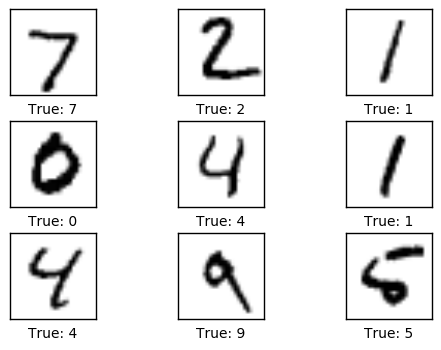

In [20]:
images = data.test.images[0:9]
cls_true = data.test.cls[0:9]
plot_images(images = images, cls_true = cls_true)

In [22]:
len(data.test.images[0])

784

In [24]:
x = tf.placeholder(tf.float32, [None, img_size_flat])

In [25]:
# this is the representation of the Y labels in the one hot encoded
y_true = tf.placeholder(tf.float32, [None, num_classes])

 

In [26]:
y_true_cls = tf.placeholder(tf.int64, [None]) # this is the regular vertion : an idex of numbers which are the labels

In [27]:
weights = tf.Variable(tf.zeros([img_size_flat, num_classes]))
biases = tf.Variable(tf.zeros([num_classes]))

In [28]:
logits = tf.matmul(x, weights) + biases

In [29]:
y_pred = tf.nn.softmax(logits)

In [58]:
y_pred_cls = tf.argmax(y_pred, dimension = 1)

In [31]:
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits = logits, labels = y_true)

In [32]:
cost = tf.reduce_mean(cross_entropy)

In [33]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.5).minimize(cost)

In [36]:
correct_prediction = tf.equal(y_pred_cls, y_true_cls)

In [37]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# Tensorflow session


In [39]:
session = tf.Session()

In [40]:
session.run(tf.initialize_all_variables())

In [41]:
batch_size = 100

In [42]:
def optimize(num_iterations):
    for i in range(num_iterations):
        x_batch, y_true_batch = data.train.next_batch(batch_size)
        feed_dict_train = {x: x_batch, y_true: y_true_batch}
        
        session.run(optimizer, feed_dict = feed_dict_train)

In [43]:
feed_dict_test = {x: data.test.images,
                 y_true: data.test.labels,
                 y_true_cls: data.test.cls}

In [45]:
def print_accuracy():
    acc = session.run(accuracy, feed_dict = feed_dict_test)
    print("Accuracy on the test-set: {0:.1%}".format(acc))

In [64]:
def print_confusion_matrix():
    cls_true = data.test.cls
    
    cls_pred = session.run(y_pred_cls, feed_dict = feed_dict_test)
    
    cm = confusion_matrix(y_true = cls_true, y_pred = cls_pred)
    print(cm)
    
    plt.imshow(cm, interpolation = 'nearest', cmap=plt.cm.Blues)
    
    plt.tight_layout()
    plt.colorbar()
    tick_marks = np.arange(num_classes)
    plt.xticks(tick_marks, range(num_classes))
    plt.yticks(tick_marks, range(num_classes))
    plt.xlabel("Predicted")
    plt.ylabel("True")

In [65]:
print_accuracy()

Accuracy on the test-set: 92.0%


In [66]:
optimize(num_iterations = 500)

In [67]:
print_accuracy()

Accuracy on the test-set: 91.9%


[[ 960    0    3    1    0    2    8    4    2    0]
 [   0 1109    2    2    0    1    4    2   15    0]
 [   8    9  925    8   13    0    9   16   40    4]
 [   3    1   33  899    0   18    3   18   24   11]
 [   1    2    5    1  918    0    9    7    9   30]
 [  11    3    7   37   11  741   19   10   46    7]
 [  11    3    9    1    9    6  909    4    6    0]
 [   2    6   25    3    6    1    0  965    2   18]
 [   8    6    9   12    9   20    8   16  876   10]
 [  10    7    2    6   35    6    0   46   10  887]]


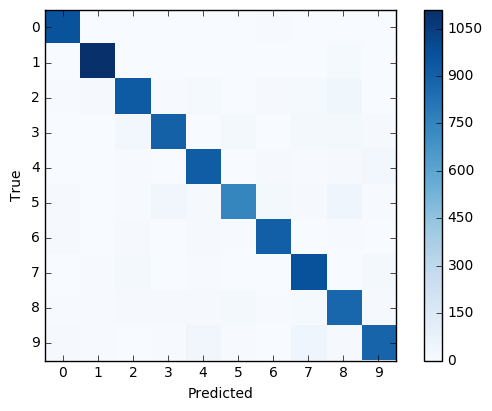

In [68]:
print_confusion_matrix()